**Purpose**: Analyze the Stand News data.

In [6]:
import os
import time
import pickle
import multiprocessing
import gensim.models.word2vec as w2v
import sklearn.manifold
from sklearn import decomposition
import numpy as np
#from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import re

In [7]:
base_path = 'C:/Users/sunny/Desktop/news_nlp/'
publisher='立場報道'
os.chdir(base_path)

In [8]:
model= w2v.Word2Vec.load(publisher + '_word2vec.w2v')

In [50]:
model.wv.most_similar("警察")

[('警隊', 0.5997955799102783),
 ('警方', 0.5754898190498352),
 ('警員', 0.5671575665473938),
 ('黑警', 0.563629150390625),
 ('____________', 0.5240626931190491),
 ('抓人', 0.5112204551696777),
 ('違反紀律', 0.5099059343338013),
 ('叫罵', 0.5049281120300293),
 ('兵工廠', 0.49959343671798706),
 ('無證', 0.49754518270492554)]

In [51]:
model.wv.most_similar("示威者")

[('舉藍旗', 0.5528481006622314),
 ('叫罵', 0.549609363079071),
 ('水馬陣', 0.5491201281547546),
 ('擲磚', 0.5449047088623047),
 ('示威', 0.5422355532646179),
 ('暴徒', 0.5383398532867432),
 ('退往', 0.5336249470710754),
 ('遮陣', 0.5307728052139282),
 ('轉移陣地', 0.5267229676246643),
 ('堵路', 0.5255725383758545)]

In [9]:
model.wv.most_similar("白衣人")

[('西鐵站', 0.66713947057724),
 ('白衣', 0.6572718620300293),
 ('元朗', 0.6542414426803589),
 ('無差別', 0.6471569538116455),
 ('白衫', 0.5943047404289246),
 ('7.21', 0.5925009250640869),
 ('恐襲', 0.5860229134559631),
 ('襲擊', 0.5839354395866394),
 ('群毆', 0.5835769772529602),
 ('白衫軍', 0.57465660572052)]

In [13]:
model.wv.most_similar("黑衣人")

[('持棍', 0.5305356383323669),
 ('二坡坊', 0.526010274887085),
 ('閘內', 0.5213887095451355),
 ('閘外', 0.5128474831581116),
 ('大漢', 0.5046553611755371),
 ('衝過來', 0.4950573742389679),
 ('互毆', 0.49450257420539856),
 ('灰衣', 0.4934418201446533),
 ('撩者', 0.4928894340991974),
 ('橋面', 0.4907723069190979)]

In [4]:
model.wv.doesnt_match(['警察','白衣人','市民'])

'白衣人'

In [53]:
model.wv.most_similar(positive=['警察','白衣人'],topn=3)

[('黑社會', 0.6492837071418762),
 ('無差別', 0.6304617524147034),
 ('白衣', 0.6128647923469543)]

In [54]:
model.wv.most_similar(positive=['警察','警隊', '警方', '警員','防暴'],negative=['良知','紀律'],topn=3)

[('警', 0.6335914731025696),
 ('防暴警察', 0.6077191829681396),
 ('天開', 0.5882387757301331)]

In [55]:
model.wv.most_similar(positive=['建制'],negative=['民主'],topn=3)

[('建制派', 0.37675905227661133),
 ('藍絲', 0.3458002209663391),
 ('鐵票', 0.3311470150947571)]

In [56]:
print(model.wv.most_similar(positive=['攻擊','示威者'],topn=3))
print(model.wv.most_similar(positive=['防守','示威者'],topn=3))

[('肆意攻擊', 0.6211118102073669), ('擎槍', 0.6114226579666138), ('擲磚', 0.6055322885513306)]
[('水馬陣', 0.612038254737854), ('遮陣', 0.596406102180481), ('交通要道', 0.5832414031028748)]


In [57]:
print(model.wv.most_similar(positive=['攻擊','警察'],topn=3))
print(model.wv.most_similar(positive=['防守','警察'],topn=3))

[('肆意攻擊', 0.6169437170028687), ('無差別', 0.6109935641288757), ('圍打', 0.595099151134491)]
[('進攻', 0.5489693880081177), ('交通要道', 0.5406858921051025), ('叫罵', 0.5356338620185852)]


In [58]:
model.wv.most_similar(positive=['遊行','市民'],topn=3)

[('集會', 0.6146628856658936),
 ('游行', 0.6018982529640198),
 ('民陣', 0.582254946231842)]

In [59]:
model.wv.most_similar(positive=['地鐵','警察'],topn=3)

[('亂打', 0.5218366384506226),
 ('亂棍', 0.5060678124427795),
 ('拉人', 0.5030932426452637)]

In [60]:
model.wv.most_similar(positive=['子彈','警察'],topn=3)

[('平射', 0.5951910614967346),
 ('射頭', 0.5739744305610657),
 ('天開', 0.5689032077789307)]

In [61]:
tnse_result = os.path.join(base_path, publisher + '_2d_tsne.pkl')
with open(tnse_result, "rb") as f:   # Unpickling
    df= pickle.load(f)

In [62]:
df.head(8)

,token,x,y
0,，,8.034629,9.827863
1,,-9.357771,29.685661
2,的,9.163763,9.171121
3,「,7.226207,11.220831
4,」,7.151229,11.328045
5,在,6.486559,10.386097
6,、,8.766822,11.133930
7,是,10.133094,9.084493


In [63]:
[word[0] for word in model.wv.most_similar("警察")]

['警隊', '警方', '警員', '黑警', '____________', '抓人', '違反紀律', '叫罵', '兵工廠', '無證']

In [64]:
# Given target token, return a df that contains
# the tsne 2D vector of its most similar tokens. 
most_similar_token = [word[0] for word in model.wv.most_similar("警察")]
d=df[df['token'].isin(most_similar_token)]
d

,token,x,y
36,警方,-7.147141,9.847122
89,警員,1.148329,-39.385155
220,警隊,41.668240,-2.948016
1047,黑警,41.260300,-3.974190
23856,叫罵,-11.127604,-34.230122
26230,違反紀律,40.740574,-1.620624
29954,抓人,8.938982,-36.910706
37141,____________,40.782150,-3.768586
37520,兵工廠,31.354019,-3.496439
39282,無證,40.837399,-3.853424


In [65]:
def plot_most_similar(model,df,token,n):
    try:
        #plt.clf()
        #plt.close('all')
        plt.figure()
        ChineseFont = FontProperties(fname = 'C:\\Windows\\Fonts\\msjh.ttc')

        most_similar_token = [word[0] for word in model.wv.most_similar(token,topn=n)]
        print(most_similar_token)
        
        d=df[df['token'].isin(most_similar_token)]

        min_x = min(d['x'].tolist())
        max_x = max(d['x'].tolist())
        min_y = min(d['y'].tolist())
        max_y = max(d['y'].tolist())

        x_range = (int(min_x)-10,int(max_x)+10)
        y_range = (int(min_y)-10,int(max_y)+10)

        plt.xlim(x_range)
        plt.ylim(y_range)
        #plt.rcParams.update({'font.size': 5})

        
        for index, row in d.iterrows():
            plt.text(x=row['x'], y=row['y'], s=row['token'], fontproperties = ChineseFont, fontsize=15, va="center")

        
        d=df.loc[df['token']==token]
        token=d.iloc[0][0]
        x_value=d.iloc[0][1]
        y_value=d.iloc[0][2]
        plt.text(x=x_value, y=y_value, s=token, fontproperties = ChineseFont, fontsize=15, va="center")

        
        plt.show()
    except:
       print(f'Can not find {token} in dataset.') 

<IPython.core.display.Javascript object>


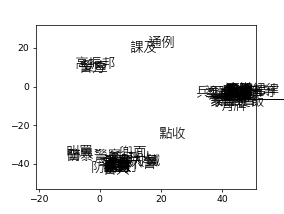

['警隊', '警方', '警員', '黑警', '____________', '抓人', '違反紀律', '叫罵', '兵工廠', '無證', '警', '黑社會', '點收', '亂射', '守紀律', '濫捕', '軍警', '射人', '圍打', '執法', '克警', '濫暴', '課及', '扑頭', '有牌', '通例', '受查', '警務人員', '射頭', '私刑', '虐打', '平射', '不依', '鳴槍示警', '高振邦', '執法者', '塗脂抹粉', '警例', '兜面', '亂打', '防暴隊', '家常便飯', '防暴警察', '警賊', '罪加一等', '警犬', '手無寸鐵', '濫權', '查辦', '暴警']


In [66]:
%matplotlib notebook
plot_most_similar(model,df,"警察",50)

<IPython.core.display.Javascript object>


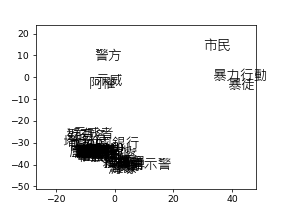

['舉藍旗', '叫罵', '水馬陣', '擲磚', '示威', '暴徒', '退往', '遮陣', '轉移陣地', '堵路', '警方', '中國銀行', '球彈', '鳴槍示警', '疑有', '油彈', '十數名', '清場', '渡路', '雜物', '天開', '警員', '射水', '2200', '阿權', '沙咀', '舉黑旗', '警亦', '擎槍', '防暴警察', '分域', '佐敦道', '平射', '1715', '沿彌敦', 'Popcorn', '投擲', '市民', '布防', '盧押', '近千名', '暴力行動', '驅散', '橙旗', '眾安街', '設路障', '南運', '警從', '龍翔', '內街']


In [67]:
%matplotlib notebook
plot_most_similar(model,df,"示威者",50)

Concordance

In [68]:
# recreating sth like the nltk's concordance function
def neighbor_text(text,keyword,n):
    key_regex = r".{0,"+str(n)+r"}" + keyword + r".{0,"+str(n)+r"}"
        # use re.escape(keyword) if keyword may contain special characters
    result_ls = re.findall(key_regex,text)
    return result_ls

In [70]:
raw_csv_path=os.path.join(base_path, publisher + '_concat.csv')
df = pd.read_csv(raw_csv_path)
content_ls = df['Content'].tolist()
all_article = ''.join([article for article in content_ls])

In [71]:
neighbor_text(all_article,'暴徒',10)[:20]

['「魚蛋革命參與者並非暴徒！」，今次變相公投的',
 '被洗腦，以為是要平息暴徒。因此這些普通兵也是',
 '冤未雪，仍背負反革命暴徒之名，他又認為不應該',
 '中國的名義，稱他們為暴徒。他們不是暴徒，他們',
 '是學生，是攻擊軍隊的暴徒」「外部勢力操控以圖',
 '九日會有外國勢力收買暴徒暴力干擾大遊行的訊息',
 '爭仿佛成了十惡不赦的暴徒之舉，政治能量便逐漸',
 '的行徑與殺人放火的「暴徒」無異。那時天真的我',
 '為所有留守的青年都是暴徒，沒有教養的，我妹妹',
 '更升級的行動，所謂「暴徒」就是這樣被極權政府',
 '車輛行駛。試問如果是暴徒，他們會這樣配合嗎？',
 '如果單純是暴徒，那就不只是堵塞馬路',
 '人生命，這才是所謂的暴徒。然而這些都沒有發生',
 '青年的心底話。我不是暴徒，我是抗爭者。我是一',
 '自由比你班乜都吾識嘅暴徒行街遊蕩，充分咁樣發',
 '動不為泄憤，群眾亦非暴徒，而是針對政府對 1',
 '師有名，這是示威者與暴徒的界線。當103萬人',
 '至曾覺得示威者都是「暴徒」，「我都會問，點解',
 '知，佢哋家陣唔係清除暴徒，係與全港市民為敵，',
 '處長盧偉聰斥示威者「暴徒！」，承認警曾發射橡']

***

In [106]:
raw_csv_path=os.path.join(base_path, publisher + '_concat.csv')
df = pd.read_csv(raw_csv_path)
df['Date']= df['Date'].str[:10]

In [107]:
df.head(2)

,Title,Author,Category,Date,Link,Content,Is_offical,Content_len
0,三大社運種籽發芽 推倒送中惡法可勝,練乙錚,政治,2019-06-01,https://www.thestandnews.com/politics/%E4%B8%8...,反對修訂《逃犯條例》的運動正風起雲湧，政府出盡吃奶力投入的「正能量」，卻成為運動的火種。大家...,False,3162
1,一座現代城市的編年史，我心中主流神劇之最：HBO《The Wire》（篇九）,陳裕匡,文化,2019-06-01,https://www.thestandnews.com/culture/%E4%B8%80...,（九）要你專注的一種形式本文含有《The Wire》的Spoilers，請斟酌使用身邊在看、...,False,883


In [108]:
def freq_by_date(df, token_ls):
    
    # group data by date and join all content of that date as one string
    df=df.groupby('Date')['Content'].apply(','.join).reset_index()
    
    # calculate word frequency for each date
    for token in token_ls:
        df[token] = df['Content'].str.count(token)
    
    return df

In [110]:
#df=freq_by_date(df, ['警察','示威','血'])
date_token_pivot_df= freq_by_date(df,'721,白衣人'.split(','))
date_token_pivot_df.loc[date_token_pivot_df['白衣人']>15] 

,Date,Content,721,白衣人
51,2019-07-22,一群白衣人士昨晚（7月21日）在元朗西鐵站向市民及記者施襲，期間用木棒等武器圍毆市民記者。《...,7,97
52,2019-07-23,今朝《早霸王》播完主題曲，森美就一邊哽咽，一路講「我唔明白，我地每一個人應該做啲乜嘢，先能夠...,1,52
53,2019-07-24,今早 8 時許，有多名年輕人響應網上發起的不合作運動，在金鐘站港島綫往柴灣方向的月台阻止列車...,5,55
54,2019-07-25,【文：一羣香港建築師】（聯署連結） 對於7月21日晚上至22日凌晨，元朗發生一批明目張膽的暴...,5,97
55,2019-07-26,中國國防部新聞發言人早前在記者會上稱，這段時間他們密切關注香港，會否介入香港事務，駐軍法有規...,15,27
59,2019-07-30,每年五月有卅一日，何來卅五日呢？「六四舞台」製作的《5 月 35 日》，劇名巧妙暗示在中國大...,4,23
60,2019-07-31,葵涌警署入夜後有大批市民聚集聲援被捕者，白衫警員手持雷明燈槍，並用槍指向市民，有警員昨晚從葵...,10,37
65,2019-08-05,8 月 5 日，將會係香港百年難遇嘅大罷工，亦係近期民意戰嘅重要一役。有別於周六日遊行示威，...,2,19
67,2019-08-07,昨天 (8.5) 七區集會及罷工完結，網上開始有「勇武是否該停一停」的爭論。書生同意大家可以...,2,20
81,2019-08-21,以國家級的媒體散播謊言、以國家級的力度深種仇恨、以國家級的手段秋後算帳，全港青少年看在眼裏，...,9,52


In [111]:
def plot_freq(df,token_ls):
    
    df= freq_by_date(df,token_ls)
    
    #plt.clf()
    #plt.cla()
    #plt.close()
    ax = plt.gca()  # gca stands for 'get current axis'
    
    for token in token_ls:
        df.plot(kind='line',x='Date',y=token,ax=ax)

    ChineseFont = FontProperties(fname = 'C:\\Windows\\Fonts\\msjh.ttc')
    plt.legend(prop=ChineseFont)
    plt.show()

<IPython.core.display.Javascript object>


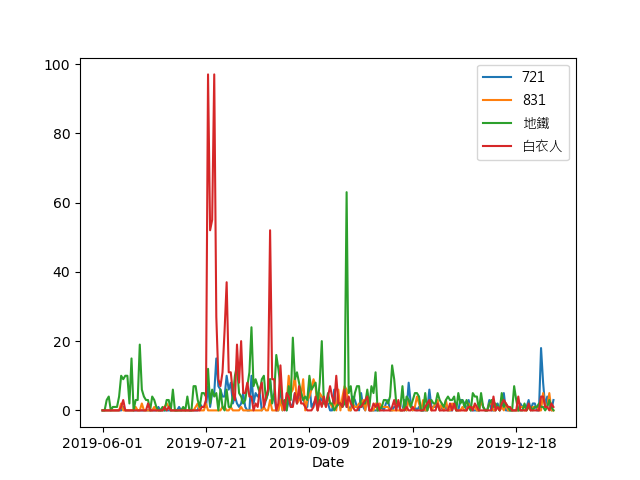

In [112]:
%matplotlib notebook
#plot_freq(df,'橡膠子彈,水砲車,催淚彈'.split(','))
plot_freq(date_token_pivot_df,'721,831,地鐵,白衣人'.split(','))
#plot_freq(df,['白衣人'])
#'警察,示威,血,白衣人'.split(',')
#['警察', '示威', '血', '白衣人']

***

In [84]:
stand_protester_list=['舉藍旗', '叫罵', '水馬陣', '擲磚', '示威', '暴徒', '退往', '遮陣', '轉移陣地', '堵路', '警方', '中國銀行', '球彈', '鳴槍示警', '疑有', '油彈', '十數名', '清場', '渡路', '雜物', '天開', '警員', '射水', '2200', '阿權', '沙咀', '舉黑旗', '警亦', '擎槍', '防暴警察', '分域', '佐敦道', '平射', '1715', '沿彌敦', 'Popcorn', '投擲', '市民', '布防', '盧押', '近千名', '暴力行動', '驅散', '橙旗', '眾安街', '設路障', '南運', '警從', '龍翔', '內街']

In [85]:
std_protester_list=['黑衣人', '堵路', '退至', '包圍', '狂擲', '與警', '傘陣', '龍匯', '防暴警察', '游擊戰', '設路障', '防暴', '警在', '防暴隊', '包抄', '黃旗', '搗亂', '清場', '叫罵', '搞事', '球彈', '擎槍', '抗議者', '居道', '封堵', '驅散', '圍困', '蒙面人', '中年男子', '後撤', '物及', '舉旗', '噴', '激進', '聚集', '施放', '指罵', '投擲', '野貓', '高呼口號', '搶犯', '追打', '身分不明', '削尖', '水馬及', '暴徒', '佐敦道', '圍觀者', '搬來', '入夜後']

In [87]:
list(set(stand_protester_list).intersection(std_protester_list))

['佐敦道', '防暴警察', '清場', '投擲', '驅散', '設路障', '暴徒', '擎槍', '球彈', '叫罵', '堵路']

***

In [81]:
def plot_token(df,token,size):
    try:
        d=df.loc[df['token']==token]
        x_value=int(d.iloc[0][1])
        y_value=int(d.iloc[0][2])
        size = int(size)
        
        fig = plt.figure()
        ChineseFont = FontProperties(fname = 'C:\\Windows\\Fonts\\msjh.ttc')
        x_range = (x_value-size,x_value+size)
        y_range = (y_value-size,y_value+size)
        #print(x_range,y_range)
        
        plt.xlim(x_range)
        plt.ylim(y_range)
        #plt.rcParams.update({'font.size': 5})

        # add annotations one by one with a loop
        for index, row in df.iterrows():
            #if index < 5:
            if row['x'] in range(x_range[0],x_range[1]) and row['y'] in range(y_range[0],y_range[1]):
                plt.text(x=row['x'], y=row['y'], s=row['token'], fontproperties = ChineseFont, fontsize=15)
                #print(row['x'], row['y'],row['token'])
        #for line in range(0,df.shape[0]):
            #if df.x[line] in range(x_range[0],x_range[1]) and df.y[line] in range(y_range[0],y_range[1]):
                #plt.text(x=df.x[line], y=df.y[line], s=df.token[line], fontproperties = ChineseFont, fontsize=15)
        plt.show()
    except:
        print(f'Can not find {token} in dataset.')

In [82]:
token=list('我是人類abc')
x=[1,2,3,4,5,6,7]
y=[1,2,3,4,5,6,7]
df = pd.DataFrame(list(zip(token,x,y)), columns=['token','x', 'y'])
df

,token,x,y
0,我,1,1
1,是,2,2
2,人,3,3
3,類,4,4
4,a,5,5
5,b,6,6
6,c,7,7


<IPython.core.display.Javascript object>


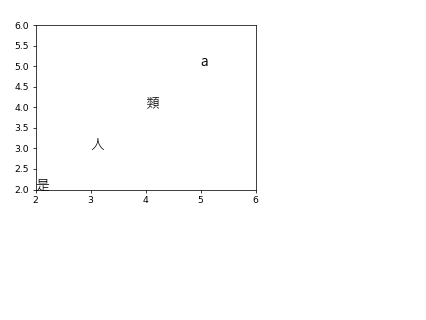

In [83]:
plot_token(df,'類',2)